In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.interactive('True')

In [2]:
import parameters

In [3]:
p = parameters.ParameterSet()

In [53]:
p.update({'A': 1,
          'k1': 2,
          'k2': 1,
          'k2M': 1,
          'k3': 1,
          'k3M': 0,
          'k4': 1,
          'k4M': 1,
          'k5': 1,
          'k5M': 0,
          'k6': 1,
          'k6M': 1
})

In [6]:
p.k3M

0

In [7]:
p.k1

2

In [8]:
p.k5M

0

In [9]:
# define differential equations

def BR_rates(y,p):
    X1 = y[0]
    X2 = y[1]
    X3 = y[2]
    B = y[3]
    C = y[4]
    
    v1 = p.k1*p.A
    v2 = p.k2*X1 - p.k2M*X2
    v3 = p.k3*X2 - p.k3M*B
    v4 = p.k4*X1 - p.k4M*X3
    v5 = p.k5*X3 - p.k5M*C
    v6 = p.k6*X3 - p.k6M*X2

    return np.array([v1,v2,v3,v4,v5,v6])

def BR_deq(y,t,p):

    v = BR_rates(y,p)
    dX1dt = v[0] - v[1] - v[3]
    dX2dt = v[1] - v[2] + v[5]
    dX3dt = v[3] - v[4] - v[5]
    dBdt = v[2]
    dCdt = v[4]
    
    dydt = np.array([dX1dt,dX2dt,dX3dt,dBdt,dCdt])
    
    return dydt

In [48]:
T = np.linspace(0,10,500)
y0 = np.zeros(5)
Y = odeint(BR_deq,y0,T,args=(p,))

In [49]:
Y.shape

(500, 5)

In [50]:
BR_deq(y0,0,p)

array([ 2.,  0.,  0.,  0.,  0.])

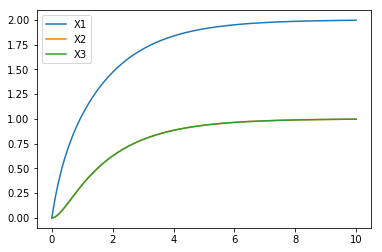

In [51]:
plt.plot(T,Y[:,0:3])
plt.legend(['X1','X2','X3'])
plt.draw()

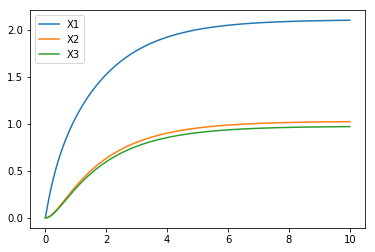

In [55]:
p2=parameters.ParameterSet(p.__dict__)
p2.k4=0.9
Y = odeint(BR_deq,y0,T,args=(p2,))
plt.plot(T,Y[:,0:3])
plt.legend(['X1','X2','X3'])
plt.draw()

In [14]:
import scipy.optimize as opt

In [20]:
def BR_deq123(x,t,p):
    x2=np.zeros(5)
    x2[0:3] = x
    dydt = BR_deq(x2,t,p)
    return dydt[0:3]

In [21]:
BR_deq123(np.zeros(3),0,p)

array([ 2.,  0.,  0.])

In [26]:
opt.root(lambda x:BR_deq123(x,0,p),np.ones(3))

    fjac: array([[-0.81611988,  0.42953678,  0.3865831 ],
       [-0.14177969, -0.79734816,  0.58662972],
       [-0.56022037, -0.42395055, -0.71163128]])
     fun: array([  3.33066907e-16,  -3.33066907e-16,  -1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([ -7.91766325e-09,  -4.79835724e-09,   9.97411235e-10])
       r: array([ 2.32808935, -1.71814712, -1.54633241,  2.83689451, -2.69901702,
        1.15072292])
  status: 1
 success: True
       x: array([ 2.10526316,  1.02631579,  0.97368421])

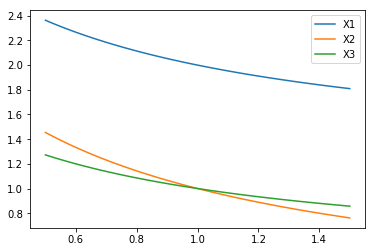

In [56]:
k3scan = np.linspace(0.5,1.5,100)
Yss = np.zeros([k3scan.size,5])
T = np.linspace(0,100,500)
for i in range(len(k3scan)):
    p.k3 = k3scan[i]
    Y = odeint(BR_deq,y0,T,args=(p,))
    Yss[i,:] = Y[-1,:]
plt.plot(k3scan,Yss[:,0:3])
plt.legend(['X1','X2','X3'])

In [30]:
k3scan = np.linspace(0.5,1.5,100)

In [34]:
len(k3scan)

100